In [85]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Remove outliar function

In [86]:
#Remove outliars(dataframe , role with outliars)
def RemoveOutLiars(data , rolename):
    Q1 = data[rolename].quantile(0.25) #Q1
    Q3 = data[rolename].quantile(0.75) #Q3
    IQR = Q3 - Q1 #IQR = Q3 - Q1
    count = 0

    tempList = [] #empty list to sort index

    #loop through list to find outliars
    for entry in data[rolename].values.tolist():
        if((entry < (Q1 - 1.5 * IQR)) or  (entry > (Q3 + 1.5 * IQR))):
            #append index
            tempList.append(count)
        count += 1
    
    #return removed list
    return data.drop(tempList)

# Split data to 7:3

In [87]:
from sklearn.model_selection import train_test_split

file = pd.read_csv('GameData_cleaned.csv' ,dtype = {'name': str,'owners':int,'developer ' : str,'positive':int ,'publisher':str , 'price ':float ,'initialprice ':float }, header=0 , keep_default_na=False , encoding='ANSI')

# split into train and test sets
train, test = train_test_split(file, test_size=0.3, random_state=1)

# summarize
print('Train', test.shape)
print('Test', train.shape)

Train (12394, 48)
Test (28918, 48)


# Display all column names 

In [88]:
list(file.columns.values)

['Unnamed: 0',
 'appid',
 'name',
 'developer',
 'publisher',
 'score_rank',
 'positive',
 'negative',
 'userscore',
 'owners',
 'average_forever',
 'average_2weeks',
 'median_forever',
 'median_2weeks',
 'price',
 'initialprice',
 'discount',
 'ccu',
 'languages',
 'genre',
 'tags',
 'genre1',
 'genre2',
 'genre3',
 'genre4',
 'genre5',
 'genre6',
 'genre7',
 'english',
 'chinese',
 'french',
 'german',
 'italian',
 'spanish',
 'total_lang',
 'lang_collection',
 'owner_cat',
 '18+',
 'Casual',
 'Indie',
 'Free To Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massivley Multiplayer',
 'Act_Adv']

In [89]:
#temp DF
owners = pd.DataFrame(file[['price' , 'owner_cat']])

<AxesSubplot:xlabel='owner_cat'>

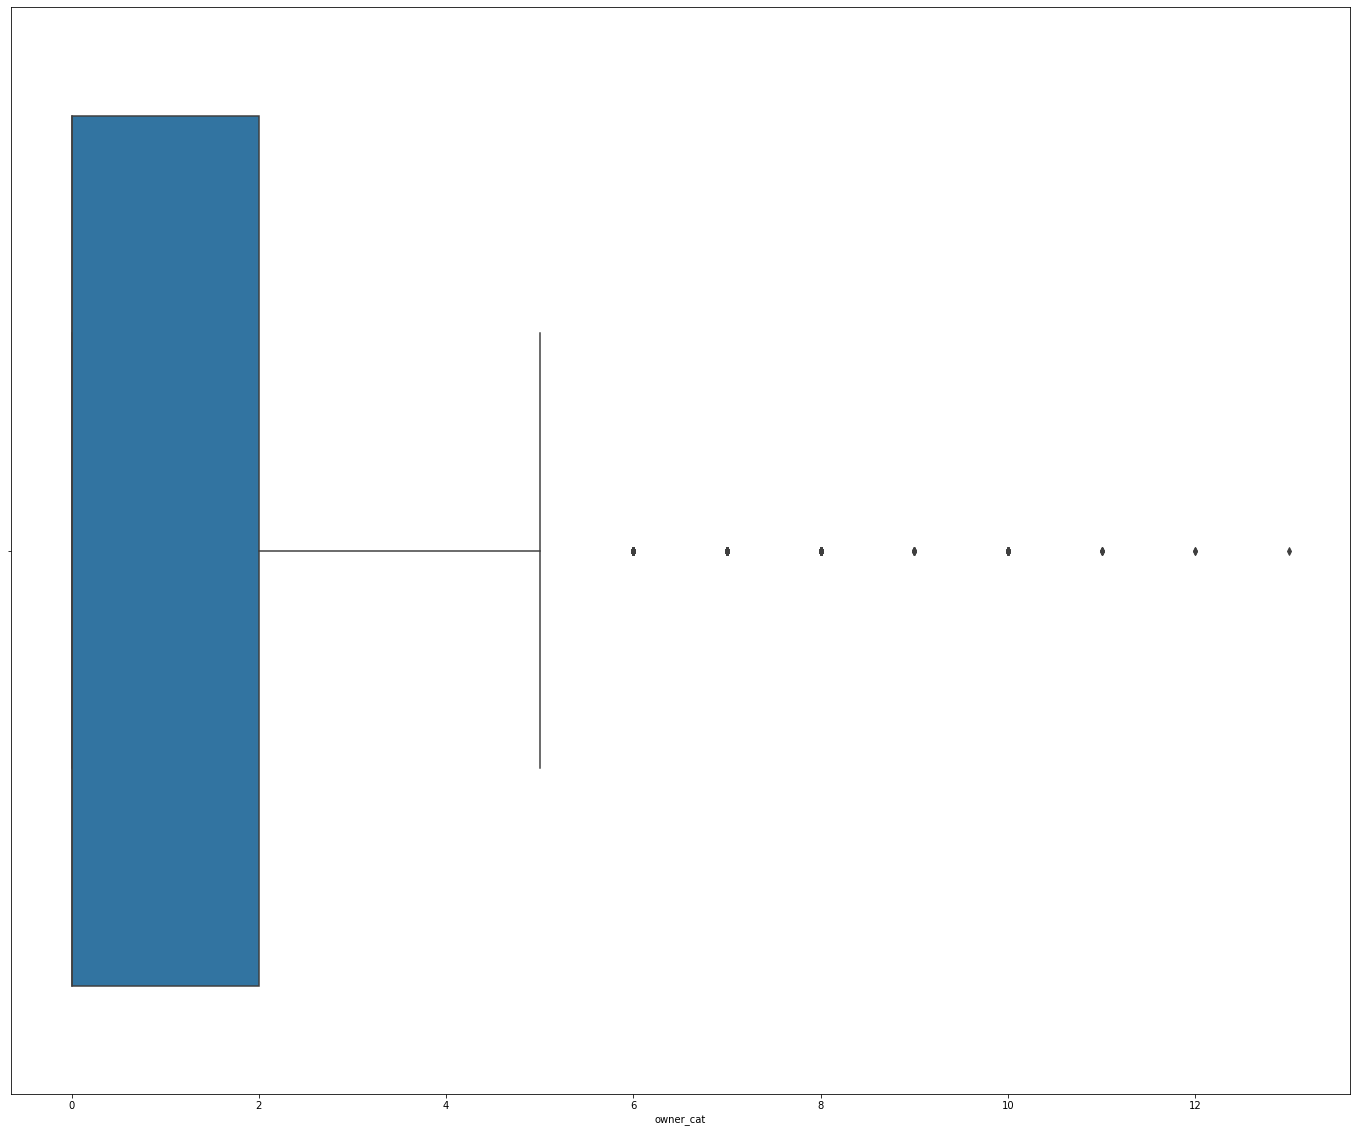

In [90]:
f = plt.figure(figsize=(24,20))
sb.boxplot(x = 'owner_cat' , data= owners)

#### 

AttributeError: 'PathCollection' object has no property 'height'

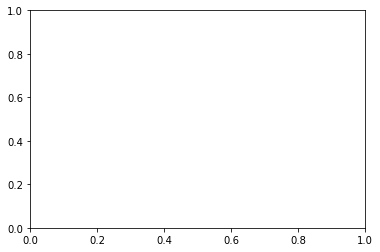

In [94]:
owners = pd.DataFrame(file[['price' , 'owner_cat']])

sb.box(x = 'price' , y = 'owner_cat' , data= owners, height= 24)

<AxesSubplot:xlabel='price', ylabel='owner_cat'>

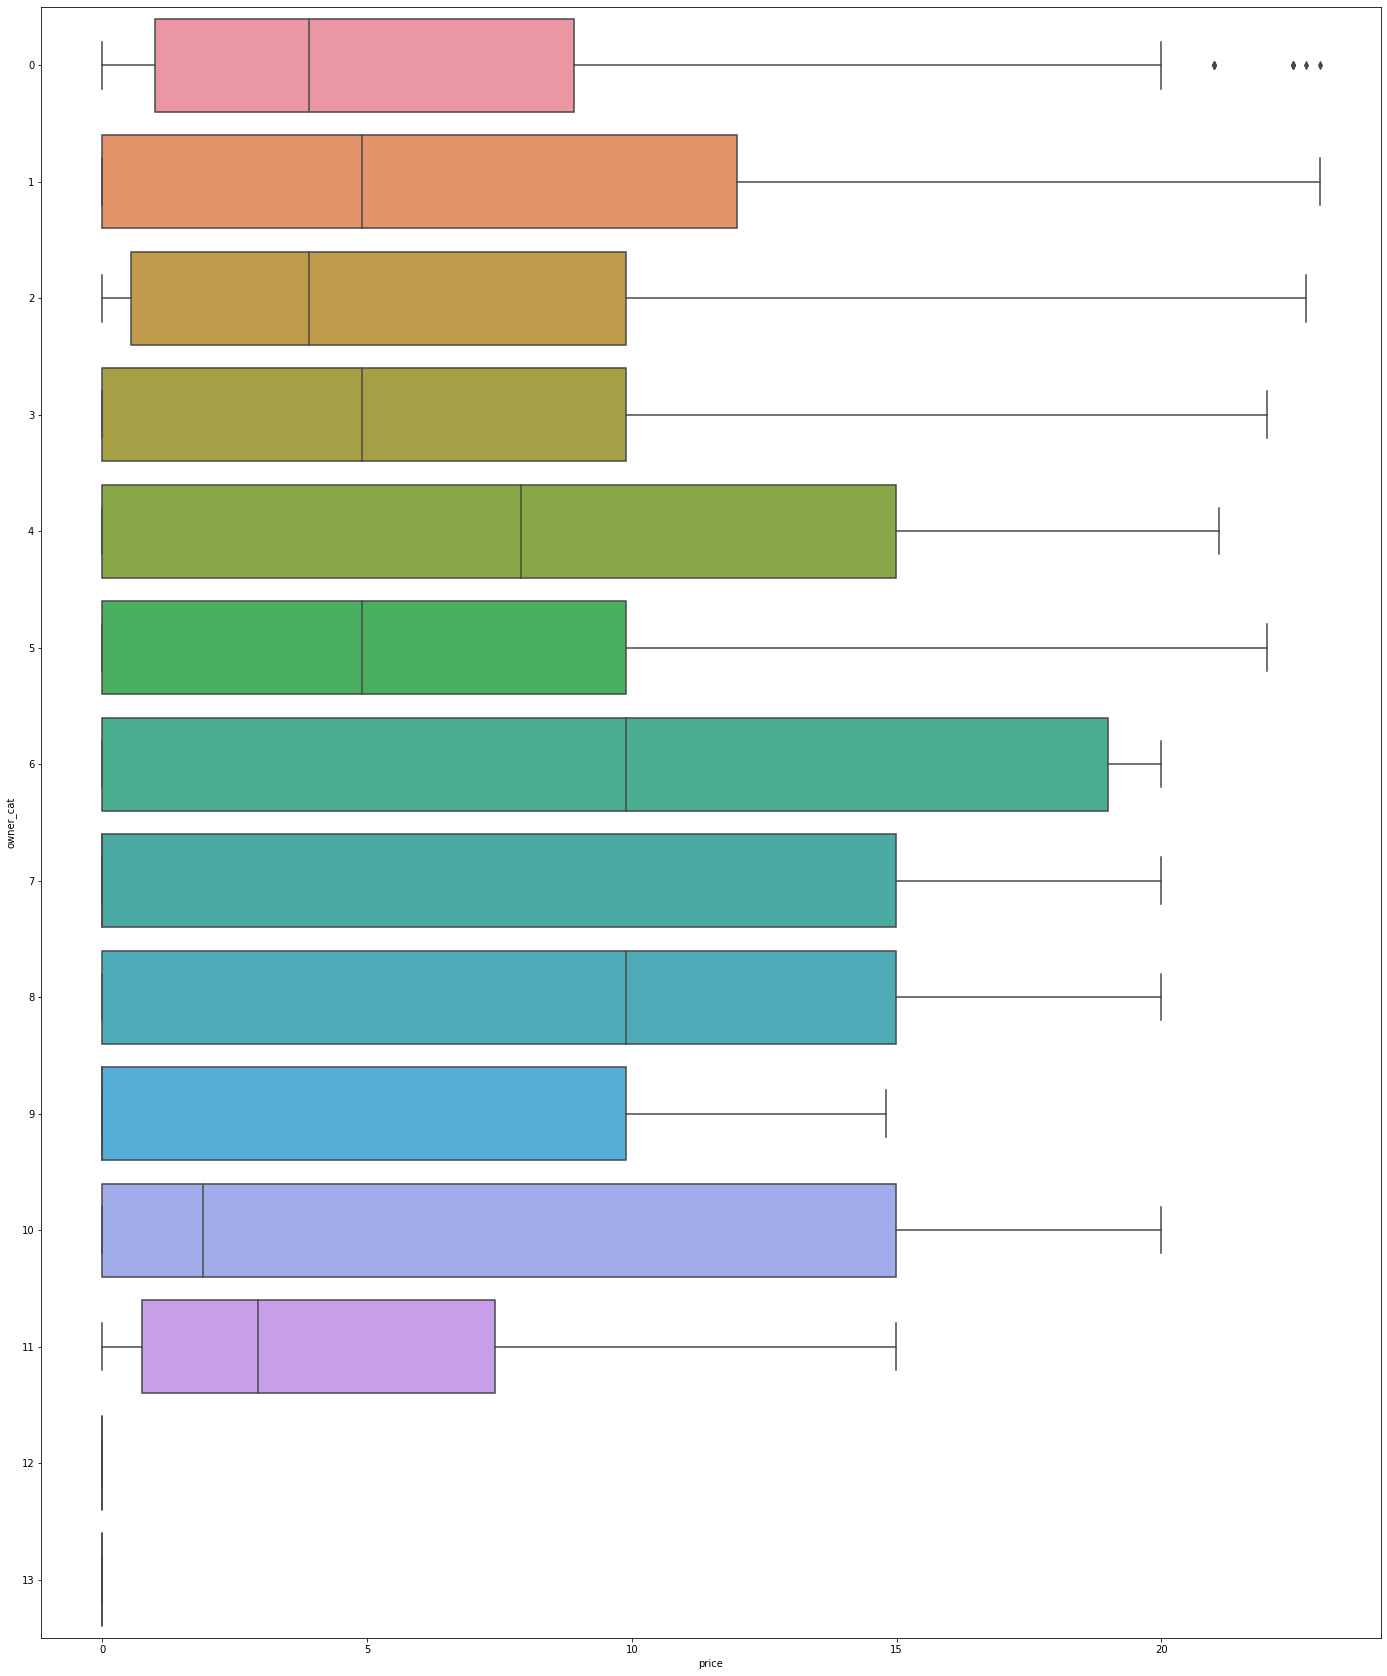

In [21]:
owners_clean = RemoveOutLiars(owners,'price')

f = plt.figure(figsize=(24,30))
sb.boxplot(x = 'price' , y = 'owner_cat' , orient='h' , data= owners_clean)

# MLP 

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [28]:
data = pd.read_csv('GameData_cleaned.csv',dtype = {'positive':int , 'price ':float ,'initialprice ':float,'positive' : int ,'negative' : int , 'negative' : int, 'english': int, 'chinese': int, 'french': int, 'german': int,'italian': int , 'spanish': int ,'total_lang' : int, 'owner_cat': int,'18+':int,'Casual':int , 'Indie': int, 'Free To Play': int, 'RPG':int , 'Strategy' : int,'Sports':int, 'Simulation' : int , 'Racing': int,'Massivley Multiplayer': int ,'Act_Adv' : int }, header=0 , keep_default_na=False , encoding='ANSI')

# Import LabelEncoder
from sklearn import preprocessing

# Spliting data into Feature and
#,'18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv'
X=data[['positive', 'initialprice', 'total_lang','18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv']]
y=data['owner_cat']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

print(len(X_train))

28918


In [83]:
# Import MLPClassifer 


from sklearn.neural_network import MLPClassifier
for i in range(1,10):
# Create model object
    clf = MLPClassifier(hidden_layer_sizes=(12,100*i),
                        random_state=3,
                        learning_rate_init=0.01,
                       alpha= 0.00001)#solver='lbfgs')

    # Fit data onto the model
    clf.fit(X_train,y_train)

    # Make prediction on test dataset
    ypred=clf.predict(X_test)

    # Import accuracy score 
    from sklearn.metrics import accuracy_score
    
    
    # Calcuate accuracy
    print(accuracy_score(y_test,ypred))

0.7343876069065677
0.7375342907858641
0.7418105534936259
0.736808132967565
0.7351137647248669
0.7386638696143295
0.7392286590285622
0.7407616588671938
0.7436662901403905


In [79]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.7380990802000968